# Vietnam Draft Lottery Analysis

We'll need some modules to complete this, so I'll set up those modules in the first block

In [12]:
import pandas as pd
import scipy.stats as stats
import numpy as np

Then, read the Excel sheet in

In [4]:
df = pd.read_excel(r'C:\Users\tsant\Documents\Data Science\Data_Stories\Chapter 02\DraftData_TS.xlsx', sheet_name = 'Raw_Data')

Explore data frame

In [5]:
df.shape #similar to dim() in r
df.head
df.tail
df.info() #similar to str() in r

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    366 non-null    datetime64[ns]
 1   Month   366 non-null    int64         
 2   Day     366 non-null    int64         
 3   N69     366 non-null    int64         
 4   N70     366 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 14.4+ KB


In [6]:
#turn the N70 column from char to int and ignore or force the missing data (*) into compliance
df['N70'] = pd.to_numeric(df['N70'], errors = 'coerce')

In [7]:
#check that things are as expected
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    366 non-null    datetime64[ns]
 1   Month   366 non-null    int64         
 2   Day     366 non-null    int64         
 3   N69     366 non-null    int64         
 4   N70     365 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 14.4 KB


In [10]:
#Calculate averages for all columns grouped by month
means = df.groupby('Month').mean()
#make array of expected average
expected_average = [(366 + 1)/2]*12
#make an array of month codes
months = list(range(1,13))
#slap that new array into dataframe
means['Expected_Avg'] = expected_average 
means['Months'] = months

In [11]:
means

,Day,N69,N70,Expected_Avg,Months
Month,,,,,
1,16.0,201.161290,151.838710,183.5,1
2,15.0,202.965517,198.892857,183.5,2
3,16.0,225.806452,179.774194,183.5,3
4,15.5,203.666667,182.166667,183.5,4
5,16.0,207.967742,183.516129,183.5,5
6,15.5,195.733333,194.566667,183.5,6
7,16.0,181.548387,183.580645,183.5,7
8,16.0,173.451613,194.354839,183.5,8
9,15.5,157.300000,209.866667,183.5,9


<AxesSubplot:xlabel='Months'>

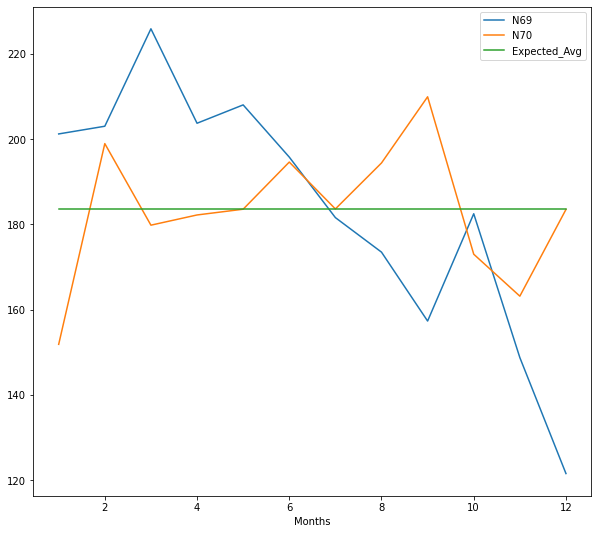

In [13]:
#Create a line graph
means.plot(x="Months", y=["N69","N70", "Expected_Avg"], kind="line", figsize = (10,9))

Last, we'll conduct t.tests to compare the first half with the second half of the year in 1969, and 1970
1) we will have to subset the data
2) we will conduct the tests

In [14]:
data_sub1 = means.loc[means['Months'] <= 6]  #subsets the dataframe for months 1 - 6
data_sub2 = means.loc[means['Months'] > 6] #subsets the dataframe for months 7 - 12

In [15]:
#Compare the first and second halves of 1969
stats.ttest_ind(a = data_sub1['N69'], b=data_sub2['N69'], equal_var = True)

Ttest_indResult(statistic=4.328426904207655, pvalue=0.001493234444951034)

In [16]:
#Compare the first and second halves of 1970
stats.ttest_ind(a = data_sub1['N70'], b=data_sub2['N70'], equal_var = True)

Ttest_indResult(statistic=-0.2920557087480774, pvalue=0.7762132997089741)

We can see the p value of the t-test for 1969 is 0.0015 and the p value of the t-test for 1970 is 0.776 meaning that there was definitely a bias in 1969 that was fixed for 1970.